# General overview on data and structure
General comment: If the number of rows to be dropped due to inconsistencies or NaN values is relatively small in comparson to the overall dataset than the rows will be rather dropped and no other means will be taken e.g. imputation.

In [996]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import random

In [997]:
# Adjust settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

In [998]:
# Load preprocessed dataset
data_path = '../data/interim/'
df = pd.read_csv(os.path.join(data_path, 'preprocessed.csv'), index_col=[0])

In [999]:
# Initial look on pre-processed data set
df.head()

,flt_leg,flt_carrier,flt_fnum,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_mingt,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_leg,gnd_sched_tat,gnd_catering_dur,gnd_clean_dur,gnd_board_dur,arr_delay
0,272005011,East Carmen Airlines,EC3098,North Gregory,East Carmen,2019-06-01 00:43:00,2019-06-01 04:12:00,ECLBSX,other problem,3.0,320,0,0,Start,"['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...",[],235.0,268.0,2019-06-01 00:40:00,2019-06-01 04:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.0
1,272009188,East Carmen Airlines,EC3146,Port Bobby,East Carmen,2019-06-01 01:58:00,2019-06-01 03:40:00,ECLWHX,no reason,-7.0,E95,0,0,Start,"['Scott Baker_nan_nan_nan_cp', 'Ruth Hoffman_n...",[],130.0,189.0,2019-06-01 02:05:00,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.0
2,271984537,East Carmen Airlines,EC2840,Port Ryan,East Carmen,2019-06-01 02:24:00,2019-06-01 03:57:00,ECLGLX,other problem,4.0,DH4,0,0,Start,"['Cory Cooper_nan_nan_nan_ca', 'Morgan Foster_...",[],185.0,196.0,2019-06-01 02:20:00,2019-06-01 03:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,272025831,East Carmen Airlines,EC3306,Coleland,East Carmen,2019-06-01 02:28:00,2019-06-01 03:49:00,ECLBMX,other problem,3.0,320,0,0,Start,"['Anne Davis_nan_nan_nan_ca', 'Miss Amanda Har...",[],145.0,175.0,2019-06-01 02:25:00,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.0
4,272006092,East Carmen Airlines,EC3114,East Melissaberg,East Carmen,2019-06-01 03:02:00,2019-06-01 04:43:00,ECLGNX,other problem,32.0,DH4,0,0,Start,"['Renee Fisher_nan_nan_nan_ca', 'Rebecca Castr...",[],35.0,21.0,2019-06-01 02:30:00,2019-06-01 04:15:00,DH4,ECLGNX,NaN,East Melissaberg,East Carmen,2019-06-01 02:30:00,2019-06-01 04:15:00,272006092.0,NaN,NaN,NaN,NaN,28.0


In [1004]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flt_leg           11934 non-null  int64  
 1   flt_carrier       11934 non-null  object 
 2   flt_fnum          11934 non-null  object 
 3   flt_dep_airpt     11934 non-null  object 
 4   flt_arr_airpt     11934 non-null  object 
 5   flt_offblock      11934 non-null  object 
 6   flt_onblock       11934 non-null  object 
 7   flt_ac_reg        11934 non-null  object 
 8   flt_change_code   11934 non-null  object 
 9   flt_dep_delay     11934 non-null  float64
 10  flt_ac_type       11934 non-null  object 
 11  flt_tt            11934 non-null  int64  
 12  flt_sched_tt      11934 non-null  int64  
 13  flt_crewg         11934 non-null  object 
 14  flt_TLC_trans     11934 non-null  object 
 15  flt_crewt_change  11934 non-null  object 
 16  flt_sched_gt      9942 non-null   float6

In [1001]:
# Indicate share and total number of missing data per variable
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(28)


,Total,Percent
gnd_clean_dur,12027,0.999751
gnd_board_dur,8299,0.689859
gnd_catering_dur,7908,0.657357
gnd_sched_tat,7908,0.657357
gnd_mingt,7908,0.657357
gnd_arr_airpt,3764,0.312884
gnd_leg,3763,0.312801
gnd_sched_arr,3763,0.312801
gnd_sched_dep,3763,0.312801
gnd_dep_airpt,3763,0.312801


In [1002]:
# Drop all rows with more than 50% missing values
df.drop(['gnd_mingt', 'gnd_catering_dur', 'gnd_clean_dur', 'gnd_board_dur'], axis=1, inplace=True)
# Drop rows with missing dependent variable
df.dropna(subset=['arr_delay'], inplace=True)
# Drop additional duplicates if there are new ones due to dropped columns
df.drop_duplicates(inplace=True, ignore_index=True)

# Univariate data exploration

In [1003]:
# Explore flt_leg
df['flt_leg'].describe()

count    1.193400e+04
mean     2.720513e+08
std      9.587711e+04
min      2.719556e+08
25%      2.719825e+08
50%      2.720113e+08
75%      2.721016e+08
max      2.723603e+08
Name: flt_leg, dtype: float64

In [1005]:
# Compare flt_leg and gnd_leg if available
df[df.gnd_leg.notna() & (df['flt_leg'].astype(object) != df['gnd_leg'].astype(object))]

,flt_leg,flt_carrier,flt_fnum,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_leg,gnd_sched_tat,arr_delay


In [1006]:
# Identify duplicates in flt_leg and drop them; drop gnd_leg as well as there is no additional information
dup_flt_leg = df[df.duplicated(['flt_leg'], keep=False)]
dup_flt_leg.to_csv('../data/interim/dup_flt_leg.csv')
df.drop_duplicates(subset='flt_leg', inplace=True, ignore_index=True)
df = df.drop(columns='gnd_leg')

In [1007]:
# Explore flt_carrier
df['flt_carrier'].value_counts()

East Carmen Airlines    11896
Name: flt_carrier, dtype: int64

In [1008]:
# Drop flt_carrier as there is no information in this column
df = df.drop(columns='flt_carrier')

In [1009]:
# Find all unique routings as combinations of fn_number, dep_ap_sched & arr_ap_sched
# Assumption that there is only one valid routing per fn_numberdf['flt_carrier'].describe()
routing = df[['flt_fnum', 'flt_dep_airpt', 'flt_arr_airpt']].value_counts().reset_index(name='count')
dup_fnnum = routing[routing.duplicated(['flt_fnum'], keep=False)]
print(dup_fnnum.sort_values(by='flt_fnum', ascending=True))

    flt_fnum     flt_dep_airpt       flt_arr_airpt  count
478  EC11525  East Allisontown           Aaronbury      5
479  EC11525         Aaronbury  North Stephenville      5
581  EC11859       East Carmen      New Stacyburgh      2
553  EC11859       East Carmen        East Michael      4
453  EC11860    New Stacyburgh         East Carmen      6
508  EC11860      East Michael      New Stacyburgh      5
562  EC11860    New Stacyburgh        East Michael      3
558  EC11860      East Michael         East Carmen      3
584  EC11869       East Carmen      South Victoria      1
607  EC11869       East Carmen           Jamesview      1
602   EC3027          West Ana         East Carmen      1
140   EC3027       East Carmen         Gilbertland     30
191   EC3117       East Carmen           Dudleyton     29
627   EC3117     Lake Joelbury         East Carmen      1
619   EC3292   South Nathaniel         East Carmen      1
220   EC3292       New Jessica         East Carmen     29
533   EC4498  

In [1010]:
# Drop flt_fnum as all information is contained in the routing itself and flight number seem to be not consistent
df = df.drop(columns='flt_fnum')

In [1011]:
# Compare flt_dep_airpt and gnd_dep_airpt if available
df[df.flt_dep_airpt.notna() & df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay
4563,271986377,Kennethfort,East Carmen,2019-06-12 13:37:00,2019-06-12 15:16:00,ECLBRX,other problem,2.0,320,23,45,A,"['Paul Bryant_182_23_45_ca', 'Shannon Schmidt_...",[],460.0,479.0,2019-06-12 13:35:00,2019-06-12 15:35:00,320,ECLBRX,South Haileyberg,East Carmen,2019-06-12 13:35:00,2019-06-12 15:35:00,-120.0,-19.0
4767,271994246,East Holly,East Carmen,2019-06-13 05:14:00,2019-06-13 06:14:00,ECLWMX,no reason,-11.0,E95,0,0,Start,"['Laura Marshall_nan_nan_nan_cp', 'Matthew Cur...",[],135.0,161.0,2019-06-13 05:25:00,2019-06-13 06:30:00,E95,ECLWMX,Paulbury,East Carmen,2019-06-13 05:25:00,2019-06-13 06:30:00,-65.0,-16.0
7691,271968559,West Jason,East Carmen,2019-06-20 09:01:00,2019-06-20 10:13:00,ECLXDX,other problem,1.0,320,4,45,A,"['Lynn Murphy_88_4_45_cp', 'Linda Watts_88_4_4...",[],85.0,92.0,2019-06-20 09:00:00,2019-06-20 10:20:00,320,ECLXDX,Kennethfort,East Carmen,2019-06-20 09:00:00,2019-06-20 10:20:00,-120.0,-7.0


In [1012]:
# Delete rows with missmatching dep_airpt and drop gnd_dep_airpt as there is no additional information in comparison to flt_dep_arpt
dep_mismatch = df[df.flt_dep_airpt.notna() & df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))]
dep_mismatch.to_csv('../data/interim/dep_mismatch.csv')
df = df.drop(df[df.flt_dep_airpt.notna() & df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))].index)
df = df.drop(columns='gnd_dep_airpt')

In [1013]:
# Compare flt_dep_airpt and gnd_dep_airpt if available
arr_mismatch = df[df.flt_arr_airpt.notna() & df.gnd_arr_airpt.notna() & (df['flt_arr_airpt'].astype(str) != df['gnd_arr_airpt'].astype(str))]
arr_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay
4287,271970762,East Carmen,West Jason,2019-06-11 19:13:00,2019-06-11 20:49:00,ECLBMX,other problem,13.0,320,28,50,A,"['Jackie Black_340_28_50_ca', 'Mark Anderson_3...","['ca', 'cp', 'cp', 'ca', 'ca']",NaN,NaN,2019-06-11 19:00:00,2019-06-11 20:20:00,320,ECLBMX,Susanmouth,2019-06-11 19:00:00,2019-06-11 20:20:00,50.0,29.0


In [1014]:
# Delete rows with missmatching dep_airpt and drop gnd_dep_airpt as there is no additional information in comparison to flt_dep_arpt
arr_mismatch.to_csv('../data/interim/arr_mismatch.csv')
df = df.drop(df[df.flt_arr_airpt.notna() & df.gnd_arr_airpt.notna() & (df['flt_arr_airpt'].astype(str) != df['gnd_arr_airpt'].astype(str))].index)
df = df.drop(columns='gnd_arr_airpt')

In [1015]:
# Explore flt_offblock 
df['flt_offblock'].describe() 

count                   11892
unique                   9657
top       2019-06-25 08:35:00
freq                        6
Name: flt_offblock, dtype: object

In [1016]:
# Explore flt_onblock 
df['flt_onblock'].describe()

count                   11892
unique                   9801
top       2019-06-28 09:52:00
freq                        5
Name: flt_onblock, dtype: object

In [1017]:
# Check mismatches in AC registration between flight data and ground data
ac_reg_mismatch = df[df.gnd_ac_reg.notna() & (df['flt_ac_reg'].astype(str) != df['gnd_ac_reg'].astype(str))]
ac_reg_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay


In [1018]:
# Drop gnd_ac_reg as all information is already contained in flt_ac_reg
df = df.drop(columns='gnd_ac_reg')

In [1019]:
# Explore flt_change_code
df['flt_change_code'].value_counts(dropna=False)

other problem         7399
technical problem     2032
rotational problem    1595
no reason              866
Name: flt_change_code, dtype: int64

count    11892.000000
mean        25.865624
std         25.685488
min        -14.000000
25%         10.000000
50%         17.000000
75%         35.000000
max        476.000000
Name: flt_dep_delay, dtype: float64


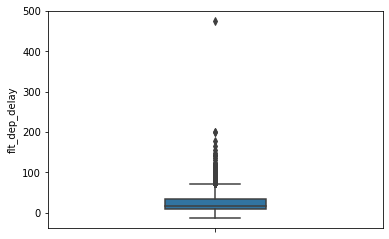

In [1020]:
# Explore flt_dep_delay
print(df['flt_dep_delay'].describe())
sns.boxplot(y=df['flt_dep_delay'], width=0.3);
plt.show()

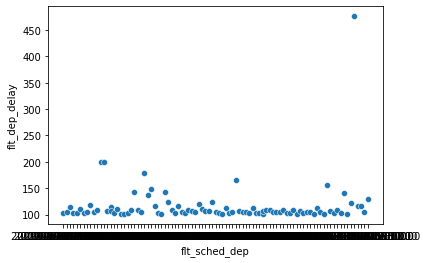

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay
269,272088536,East Elizabethside,East Carmen,2019-06-01 17:17:00,2019-06-01 19:05:00,ECLBPX,technical problem,102.0,320,45,45,A,"['Felicia Oneal_210_45_45_ca', 'Jennifer Garci...",[],50.0,-27.0,2019-06-01 15:35:00,2019-06-01 17:30:00,320,2019-06-01 15:35:00,2019-06-01 17:30:00,NaN,95.0
961,272023337,Lake Williammouth,East Carmen,2019-06-03 14:44:00,2019-06-03 16:35:00,ECLBLX,technical problem,104.0,320,38,40,A,"['Ryan Hubbard_174_38_40_ca', 'Samantha Mcguir...",[],15.0,30.0,2019-06-03 13:00:00,2019-06-03 14:55:00,320,2019-06-03 13:00:00,2019-06-03 14:55:00,NaN,100.0
1006,271957783,East Carmen,Lake Lawrencechester,2019-06-03 17:05:00,2019-06-03 18:23:00,ECLBLX,technical problem,115.0,320,185,180,C,"['Joyce Bishop_nan_nan_nan_ca', 'Tony Myers_na...","['ca', 'cp', 'cp', 'ca']",70.0,-33.0,2019-06-03 15:10:00,2019-06-03 16:40:00,320,2019-06-03 15:10:00,2019-06-03 16:40:00,15.0,103.0
1017,271967327,East Carmen,Lake Danielburgh,2019-06-03 17:07:00,2019-06-03 18:16:00,ECLGQX,technical problem,102.0,DH4,47,65,A,"['Shane Thompson_241_47_65_ca', 'Lauren Martin...","['ca', 'ca', 'cp']",35.0,-53.0,2019-06-03 15:25:00,2019-06-03 16:45:00,DHX,2019-06-03 15:25:00,2019-06-03 16:45:00,65.0,91.0
1056,272012347,Lake Kevin,East Carmen,2019-06-03 18:27:00,2019-06-03 19:08:00,ECLGRX,technical problem,102.0,DH4,24,40,A,"['Gerald Davis DDS_278_24_40_cp', 'Monica Ford...",[],40.0,-37.0,2019-06-03 16:45:00,2019-06-03 17:35:00,DHX,2019-06-03 16:45:00,2019-06-03 17:35:00,NaN,93.0
1436,271999496,East Carmen,Gilbertland,2019-06-04 17:25:00,2019-06-04 19:09:00,ECLGRX,technical problem,110.0,DH4,73,75,C,"['Jeff Hays_nan_nan_nan_cp', 'Danielle Lindsey...","['ca', 'ca']",40.0,-56.0,2019-06-04 15:35:00,2019-06-04 17:20:00,DHX,2019-06-04 15:35:00,2019-06-04 17:20:00,80.0,109.0
1450,271977429,North Jeffrey,East Carmen,2019-06-04 17:27:00,2019-06-04 19:06:00,ECLDGX,technical problem,102.0,320,0,0,Start,"['Juan Dalton_nan_nan_nan_cp', 'Denise Calhoun...",[],105.0,25.0,2019-06-04 15:45:00,2019-06-04 17:30:00,NaN,NaN,NaN,NaN,96.0
1487,271998036,Joneshaven,East Carmen,2019-06-04 19:35:00,2019-06-04 20:50:00,ECLDAX,technical problem,105.0,320,57,50,A,"['Katie Kirby_294_57_50_ca', 'William Flynn_29...",[],80.0,-8.0,2019-06-04 17:50:00,2019-06-04 19:10:00,319,2019-06-04 17:50:00,2019-06-04 19:10:00,NaN,100.0
1753,272212852,South Nathaniel,East Carmen,2019-06-05 13:49:00,2019-06-05 16:04:00,ECLBCX,technical problem,119.0,320,44,75,A,"['Cynthia Fernandez_142_44_75_ca', 'Sherri Ber...",[],60.0,40.0,2019-06-05 11:50:00,2019-06-05 14:15:00,321,2019-06-05 11:50:00,2019-06-05 14:15:00,NaN,109.0
1759,271975540,Fisherhaven,Lake Lawrencechester,2019-06-05 14:14:00,2019-06-05 15:18:00,ECLGQX,technical problem,104.0,DH4,0,0,Start,"['Sandy Mendoza_nan_nan_nan_ca', 'Brian Gonzal...",[],40.0,-56.0,2019-06-05 12:30:00,2019-06-05 13:40:00,NaN,NaN,NaN,NaN,98.0


In [1021]:
# Identification of the outlier, storing it to a csv file and dropping it from the dataframe
outlier_dep_delay = df[(df['flt_dep_delay'] > 100)]
outlier_dep_delay.to_csv('../data/interim/outlier.csv')
#df = df.drop(index=outlier_dep_delay.index)
sns.scatterplot(x='flt_sched_dep', y='flt_dep_delay', data=outlier_dep_delay);
plt.show()
outlier_dep_delay

#df[df['flt_ac_reg'] == 'ECLGBX']

In [1022]:
# Explore flt_ac_type
df.flt_ac_type.value_counts(dropna=False)

320    5990
E95    3230
DH4    2672
Name: flt_ac_type, dtype: int64

In [1023]:
# Explore gnd_ac_type
df.gnd_ac_type.value_counts(dropna=False)

NaN    3657
320    2952
E95    2179
DH4    1165
319     860
DHX     434
321     329
322     316
Name: gnd_ac_type, dtype: int64

In [1024]:
# Check mismatch in ac type between flight and ground data
pd.crosstab(df['flt_ac_type'], df['gnd_ac_type'])

gnd_ac_type,319,320,321,322,DH4,DHX,E95
flt_ac_type,,,,,,,
320,860,2952,329,316,0,0,0
DH4,0,0,0,0,1165,434,0
E95,0,0,0,0,0,0,2179


In [1025]:
# Keep flt_ac_type and drop gnd_ac_type as there is more data in flt_ac_type and all values in gnd_ac_type are derivates of the ones in flt_ac_types
df = df.drop(columns='gnd_ac_type')
# Alternativ könnte auch geschaut werden, ob für jede registration mindestens einmal eine aircraft type genannt wurde und den übernehmen und im zweiten schritt clustern

count    11892.000000
mean        27.739657
std         31.888664
min       -134.000000
25%          0.000000
50%         28.000000
75%         49.000000
max        470.000000
Name: flt_tt, dtype: float64


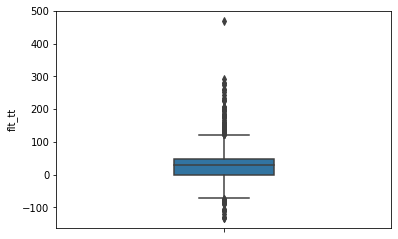

In [1026]:
# Explore flt_tt
print(df.flt_tt.describe())
sns.boxplot( y=df['flt_tt'], width=0.3);
plt.show()

count    11892.000000
mean        34.958375
std         31.527233
min          0.000000
25%          0.000000
50%         45.000000
75%         50.000000
max        495.000000
Name: flt_sched_tt, dtype: float64


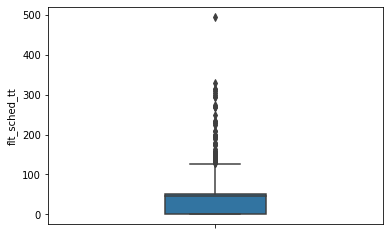

In [1027]:
# Explore flt_sched_tt
print(df.flt_sched_tt.describe())
sns.boxplot( y=df['flt_sched_tt'], width=0.3);
plt.show()

In [1028]:
# Explore flt_crewg
df.flt_crewg.value_counts(dropna=False)

A        5945
Start    4283
C         746
B         493
B2        425
Name: flt_crewg, dtype: int64

In [1029]:
# Explore flt_TLC_trans
# Ensuring that nested lists are stored as such
df['flt_TLC_trans'] = df['flt_TLC_trans'].apply(eval)
df.flt_TLC_trans.describe()	

count                                                 11892
unique                                                11824
top       [Zachary Coleman_64_43_45_ca, Tony Cobb_64_43_...
freq                                                      2
Name: flt_TLC_trans, dtype: object

In [1030]:
# Explore flt_crewt_change
df['flt_crewt_change'] = df['flt_crewt_change'].apply(eval)
df.flt_crewt_change.describe()

count     11892
unique       56
top          []
freq       9884
Name: flt_crewt_change, dtype: object

count    9901.000000
mean       62.862337
std        55.460179
min      -245.000000
25%        45.000000
50%        50.000000
75%        65.000000
max       945.000000
Name: flt_sched_gt, dtype: float64


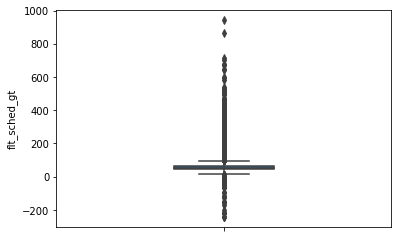

In [1031]:
# Explore flt_sched_gt
print(df['flt_sched_gt'].describe())
sns.boxplot(y=df['flt_sched_gt'], width=0.3);
plt.show()

count    9901.000000
mean       66.598323
std        69.613952
min      -383.000000
25%        33.000000
50%        60.000000
75%        87.000000
max       947.000000
Name: flt_act_gt, dtype: float64


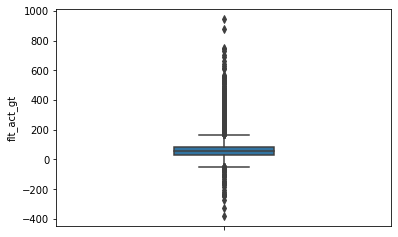

In [1032]:
# Explore flt_act_gt
print(df['flt_act_gt'].describe())
sns.boxplot(y=df['flt_act_gt'], width=0.3);
plt.show()

In [1033]:
# Check mismatches in sched dep between flight data and ground data
sched_dep_mismatch = df[df.gnd_sched_dep.notna() & (df['flt_sched_dep'].astype(str) != df['gnd_sched_dep'].astype(str))]
sched_dep_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_dep,gnd_sched_arr,gnd_sched_tat,arr_delay


In [1034]:
# Drop gnd_sched_dep as all information is already contained in flt_sched_dep; create new feature for day of the week and hour of the day
df = df.drop(columns='gnd_sched_dep')

In [1035]:
# Check mismatches in sched dep  between flight data and ground data
sched_arr_mismatch = df[df.gnd_sched_arr.notna() & (df['flt_sched_arr'].astype(str) != df['gnd_sched_arr'].astype(str))]
sched_arr_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_arr,gnd_sched_tat,arr_delay


In [1036]:
# Drop gnd_sched_arr as all information is already contained in flt_sched_arr; create new feature for hour of the day
df = df.drop(columns='gnd_sched_arr')

In [1037]:
df.to_csv('../data/interim/cleaned.csv')
df.head()

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_tat,arr_delay
0,272005011,North Gregory,East Carmen,2019-06-01 00:43:00,2019-06-01 04:12:00,ECLBSX,other problem,3.0,320,0,0,Start,"[Jason Brown_nan_nan_nan_cp, Jacob Stein_nan_n...",[],235.0,268.0,2019-06-01 00:40:00,2019-06-01 04:30:00,NaN,-18.0
1,272009188,Port Bobby,East Carmen,2019-06-01 01:58:00,2019-06-01 03:40:00,ECLWHX,no reason,-7.0,E95,0,0,Start,"[Scott Baker_nan_nan_nan_cp, Ruth Hoffman_nan_...",[],130.0,189.0,2019-06-01 02:05:00,2019-06-01 04:00:00,NaN,-20.0
2,271984537,Port Ryan,East Carmen,2019-06-01 02:24:00,2019-06-01 03:57:00,ECLGLX,other problem,4.0,DH4,0,0,Start,"[Cory Cooper_nan_nan_nan_ca, Morgan Foster_nan...",[],185.0,196.0,2019-06-01 02:20:00,2019-06-01 03:50:00,NaN,7.0
3,272025831,Coleland,East Carmen,2019-06-01 02:28:00,2019-06-01 03:49:00,ECLBMX,other problem,3.0,320,0,0,Start,"[Anne Davis_nan_nan_nan_ca, Miss Amanda Harris...",[],145.0,175.0,2019-06-01 02:25:00,2019-06-01 04:00:00,NaN,-11.0
4,272006092,East Melissaberg,East Carmen,2019-06-01 03:02:00,2019-06-01 04:43:00,ECLGNX,other problem,32.0,DH4,0,0,Start,"[Renee Fisher_nan_nan_nan_ca, Rebecca Castro_n...",[],35.0,21.0,2019-06-01 02:30:00,2019-06-01 04:15:00,NaN,28.0
